In [10]:
from modules.perlin import PerlinNoiseGenerator
from modules.tectonic import TectonicGenerator
import numpy as np

size = 2**8
seed = 16
g1 = TectonicGenerator(size=size, smoothing=size//12, plates_clusters=24, plates_iterations=2, seed=seed)
gen1 = g1.generate()
g2 = PerlinNoiseGenerator(size=size, scale=.01, octaves=4, seed=seed)
gen2 = g2.generate()

gen = gen1 * gen2
gen = (gen - np.min(gen)) / (np.max(gen) - np.min(gen))

[Tectonic] (256 size, 21 smoothing)
[Voronoi] (256 size, 24 clusters, 2 iterations
[PerlinNoise] (256 size, 0.01 scale, 4 octaves)


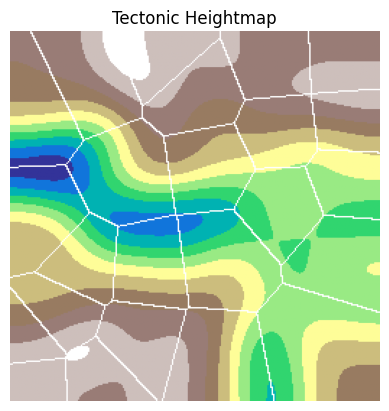

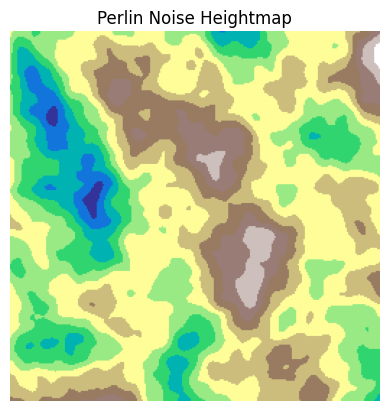

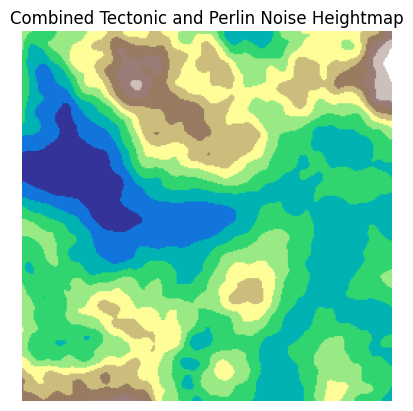

In [11]:
import numpy as np
from matplotlib import pyplot as plt

plate_overlay = g1.boundary_mask
gen1[plate_overlay] = 1
plt.imshow(np.round(gen1, 1), cmap='terrain')
plt.title('Tectonic Heightmap')
plt.axis('off')
plt.savefig('figures/tectonic_heightmap.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

plt.imshow(np.round(gen2, 1), cmap='terrain')
plt.title('Perlin Noise Heightmap')
plt.axis('off')
plt.savefig('figures/perlin_heightmap.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

plt.imshow(np.round(gen, 1), cmap='terrain')
plt.title('Combined Tectonic and Perlin Noise Heightmap')
plt.axis('off')
plt.savefig('figures/combined_heightmap.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

# Interactive Parameter Tuning

In [ ]:
!pip install ipywidgets

In [ ]:
from modules.perlin import PerlinNoiseGenerator
from modules.tectonic import TectonicGenerator
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider

size = 2**8
seed = 16
g2 = PerlinNoiseGenerator(size=size, scale=.01, octaves=4, seed=seed)
gen2 = g2.generate()

@interact(
    plates=IntSlider(min=2, max=32, step=2, value=12, description='Plates'),
    plate_smoothing=IntSlider(min=0, max=size//2, step=size//32, value=size//12, description='Plate Smoothing'),
    plate_iterations=IntSlider(min=1, max=5, step=1, value=2, description='Plate Iterations')
)
def update(plates, plate_smoothing, plate_iterations):
    g1 = TectonicGenerator(size=size, smoothing=plate_smoothing, plates_clusters=plates, plates_iterations=plate_iterations, seed=seed)
    gen1 = g1.generate()

    gen = gen1 * gen2
    gen = (gen - np.min(gen)) / (np.max(gen) - np.min(gen))
    
    plt.imshow(np.round(gen, 1), cmap='terrain')
    plt.title('Combined Tectonic and Perlin Noise Heightmap')
    plt.axis('off')
    plt.show()

[PerlinNoise] (256 size, 0.01 scale, 4 octaves)


interactive(children=(IntSlider(value=12, description='Plates', max=32, min=2, step=2), IntSlider(value=21, de…